In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gpplot as gpp
import csv, requests, warnings
warnings.filterwarnings("ignore")

In [2]:
var_dict = {'085':'WTCas9',
            '151':'Cas9-HF1',
            '152':'eCas9-1.1',
            '153':'evoCas9',
            '154':'xCas9',
            '155':'Cas9-VQR',
            '156':'Cas9-VRER',
            '157':'HypaCas9',
            '275':'Cas9-NG',
            '381':'IDTCas9'
            }

In [3]:
# Reading supplementary table 6 of Kim et al, 2020
# Average indel frequencies at target sequences, grouped by four-nucleotide PAM sequences for xCas9, Cas9-NG and wtCas9
def read_parse_Kim():
    df_xcas9 = pd.read_excel('../data_v3/Fig 1_3_PanPAM on-target/external/Kim2020/xCas9_Cas9-NG_wtCas9/41551_2019_505_MOESM8_ESM.xlsx',
                             sheet_name='xCas9 (Day 3)',
                             usecols=['four-nucleotide PAM','Number of protospacers','Average indel frequencies'])
    df_xcas9 = df_xcas9.dropna(axis=0)
    df_ng = pd.read_excel('../data_v3/Fig 1_3_PanPAM on-target/external/Kim2020/xCas9_Cas9-NG_wtCas9/41551_2019_505_MOESM8_ESM.xlsx',
                          sheet_name='SpCas9-NG (Day 3)',
                          usecols=['four-nucleotide PAM','Number of protospacers','Average indel frequencies'])
    df_ng = df_ng.dropna(axis=0)    
    df_wt = pd.read_excel('../data_v3/Fig 1_3_PanPAM on-target/external/Kim2020/xCas9_Cas9-NG_wtCas9/41551_2019_505_MOESM8_ESM.xlsx',
                          sheet_name='SpCas9 (Day 3)',
                          usecols=['four-nucleotide PAM','Number of protospacers','Average indel frequencies'])
    df_wt = df_wt.dropna(axis=0)
    return df_xcas9, df_ng, df_wt

def read_parse_gpp():
    df = pd.read_table('../data_v3/Fig 1_3_PanPAM on-target/processed/fractionactive_allsgRNA_v1.txt',
                    usecols=['PAM',
                             'A375_085_AVGLFC_frompDNA',
                             'A375_154_AVGLFC_frompDNA',
                             'A375_275_AVGLFC_frompDNA',
                             'N_PAM'])
    df = df.rename(columns={'A375_085_AVGLFC_frompDNA':'WTCas9',
                           'A375_154_AVGLFC_frompDNA':'xCas9-3.7',
                           'A375_275_AVGLFC_frompDNA':'Cas9-NG'})
    return df
    

In [4]:
kim_xcas9, kim_ng, kim_wt = read_parse_Kim()
kim_data = pd.merge(kim_xcas9, kim_ng, on='four-nucleotide PAM',suffixes=['_xCas9','_NG'])
kim_data = pd.merge(kim_data, kim_wt, on='four-nucleotide PAM')
kim_data = kim_data.rename(columns={'four-nucleotide PAM':'PAM','Number of protospacers':'Number of protospacers_WT','Average indel frequencies':'Average indel frequencies_WT'})

In [5]:
gpp_data = read_parse_gpp()

In [6]:
gpp_kim = pd.merge(gpp_data, kim_data, on='PAM')

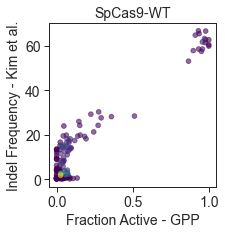

In [7]:
gpp.set_aesthetics(context='paper', palette='Set2')
fig, ax = plt.subplots(figsize=(3,3))
g = gpp.point_densityplot(gpp_kim, x='WTCas9',y='Average indel frequencies_WT')
t = plt.title('SpCas9-WT', fontsize=14)
t = plt.xlabel('Fraction Active - GPP',fontsize=14)
t = plt.ylabel('Indel Frequency - Kim et al.',fontsize=14)
t = plt.tick_params(axis='both', labelsize=14)

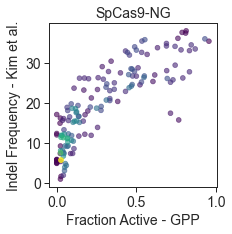

In [8]:
gpp.set_aesthetics(context='paper', palette='Set2')
fig, ax = plt.subplots(figsize=(3,3))
g = gpp.point_densityplot(gpp_kim, x='Cas9-NG',y='Average indel frequencies_NG')
t = plt.title('SpCas9-NG', fontsize=14)
t = plt.xlabel('Fraction Active - GPP',fontsize=14)
t = plt.ylabel('Indel Frequency - Kim et al.',fontsize=14)
t = plt.tick_params(axis='both', labelsize=14)

In [9]:
pam_type = []
for i in gpp_kim.N_PAM:
    pam = ''
    if i == 'NGGN':
        pam = i
    elif i == 'NGAN':
        pam = i
    elif i == 'NGCN':
        pam = i
    elif i == 'NGTN':
        pam = i
    else:
        pam = 'other'
    pam_type.append(pam)

In [10]:
gpp_kim['n_pam_hue'] = pam_type

In [11]:
gpp.set_aesthetics(context='paper', palette='Set2')

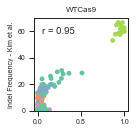

In [16]:
gpp.set_aesthetics(context='paper', palette='Set2')
fig, ax = plt.subplots(figsize=(1.7,1.7))
g = sns.scatterplot(data=gpp_kim, x='WTCas9',y='Average indel frequencies_WT', hue='n_pam_hue', palette='Set2',
                   linewidth = 0, legend=False)
gpp.add_correlation(data=gpp_kim, x='WTCas9',y='Average indel frequencies_WT')
#g = plt.legend(bbox_to_anchor=(1,1))
t = plt.title('WTCas9', fontsize=8)
t = plt.xlabel('',fontsize=7)
t = plt.ylabel('Indel Frequency - Kim et al.',fontsize=7)
t = plt.tick_params(axis='both', labelsize=7)
plt.ylim(0,70)
plt.savefig('Kim-WT.pdf', dpi=1000, transparent=True, bbox_inches='tight')

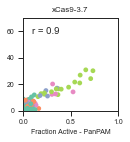

In [19]:
gpp.set_aesthetics(context='paper', palette='Set2')
fig, ax = plt.subplots(figsize=(1.7,1.7))
g = sns.scatterplot(data=gpp_kim, x='xCas9-3.7',y='Average indel frequencies_xCas9', hue='n_pam_hue', linewidth = 0,
                   legend=False)
gpp.add_correlation(data=gpp_kim, x='xCas9-3.7',y='Average indel frequencies_xCas9')
#g = plt.legend(bbox_to_anchor=(1,1))
t = plt.title('xCas9-3.7', fontsize=8)
t = plt.xlabel('Fraction Active - PanPAM',fontsize=7)
t = plt.ylabel('',fontsize=7)
t = plt.tick_params(axis='both', labelsize=7)
t = plt.xticks([0, 0.5, 1])
plt.ylim(0,70)
plt.xlim(0,1)
plt.savefig('Kim-xCas9.pdf', dpi=1000, transparent=True, bbox_inches='tight')

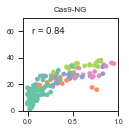

In [21]:
gpp.set_aesthetics(context='paper', palette='Set2')
fig, ax = plt.subplots(figsize=(1.7,1.7))
g = sns.scatterplot(data=gpp_kim, x='Cas9-NG',y='Average indel frequencies_NG', hue='n_pam_hue', linewidth = 0, 
                   legend=False)
gpp.add_correlation(data=gpp_kim, x='Cas9-NG',y='Average indel frequencies_NG')
#g = plt.legend(bbox_to_anchor=(1,1))
t = plt.title('Cas9-NG', fontsize=8)
t = plt.xlabel('',fontsize=7)
t = plt.ylabel('',fontsize=7)
t = plt.tick_params(axis='both', labelsize=7)
plt.ylim(0,70)
plt.savefig('Kim-NG.pdf', dpi=1000, transparent=True, bbox_inches='tight')

In [22]:
print(len(gpp_kim))

148
